# Introduction

**ASSIGNMENT DEADLINE: 12 September 2019 (Thursday)**

$\textbf{Exercise 1: Segmentation}$

- In this assignment, your task is to implement the "kmeans" and "mean_shift" clusttering algorithms for the segmentation of images.
- Implement all operation in Segmentation_method.py file.
- Along with the coding implementation, answer the questions available inside this notebook.
- Submit the notebook along with outputs stored in the output/ directory
- You can call functions implemented outside of the marked coding block. But do not change existing functions, e.g., rename the function or delete some functions. Do not change the folder structure, e.g., rename the files or delete some files;

In [2]:
# Setup
from time import time
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2



In this assignment, you will use clustering algorithms to segment images. You will then use these segmentation to identify foreground and background objects.

Your assignment will involve the following subtasks:

$\textbf{Different image feature/distance function}$: Learn to show different image feature,such as greyscale intensity feature, RGB feature and texture features and understand the differnces of them. ($\textbf{15 Points}$)

$\textbf{Clustering algorithms}$: Implement kmeans clustering and mean shift clustering. Please print the algorithm work time  ($\textbf{60 Points}$).

$\textbf{Quantitative Evaluation}$: Evaluate the two segmentation algorithms with a variety of parameter settings by comparing you computed segmentations against a test dataset ground-truth segmentations. ($\textbf{25 Points}$)

$\textbf{1. Image Feature}$

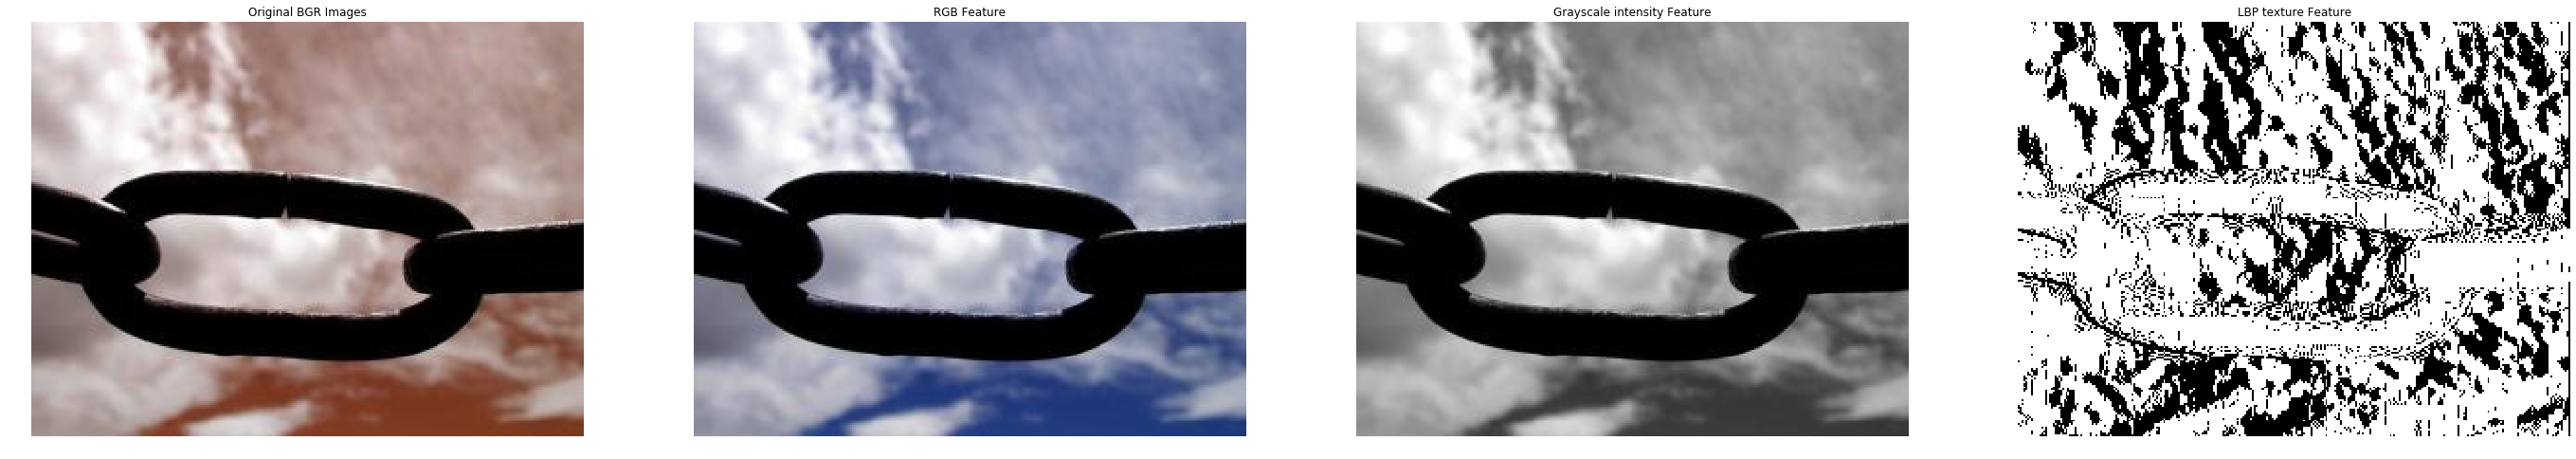

BGR feature image shape (225, 300, 3)
RGB feature image shape (225, 300, 3)
gray feature image shape (225, 300)
textual feature image shape (225, 300)


In [2]:
plt.rcParams['figure.figsize'] = (48.0, 20) #set default size of plots
img = cv2.imread("input\\003.png")


plt.subplot(1,4,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original BGR Images')


# RGB Feature
show_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(1,4,2)
plt.imshow(show_img)
plt.axis('off')
plt.title('RGB Feature')


#Gray Scale Feature
plt.subplot(1,4,3)
img_gray = cv2.cvtColor(show_img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.title('Grayscale intensity Feature')
#plt.show()


#textual features lbp algorithm
from skimage.feature import local_binary_pattern
# settings for LBP
radius = 1 
n_points = 1 * radius
lbp = local_binary_pattern(img_gray,n_points,radius)

plt.subplot(1,4,4)
plt.imshow(lbp,cmap='gray')
plt.axis('off')
plt.title('LBP texture Feature')
plt.show()
print("BGR feature image shape",img.shape)
print("RGB feature image shape",show_img.shape)
print("gray feature image shape",img_gray.shape)
print("textual feature image shape",lbp.shape)

$\textbf{QUESTION 1:}$

Please think the difference between the above features?

Write your analysis in the cell below.

$\textbf{Your answer here:}$

The BGR feature reads the value of "blue" as red and vice versa. Therefore, the pixels that appear blue under RGB appear reddish under BGR.

Conversely, RGB "switches" the blue and red channels around as compared to BGR.

Both BGR and RGB have 3 dimensions because 3 values are needed to represent that red, blue and green colors.

In contrast, the gray feature image has only two dimensions because there is no need to store the color information. Only one value to represent the intensity of gray is enough.

The textual featuer image is also two dimensional, but unlike the gray feature which represents a weighted average of the 3 colors of each pixel, the textual feature adjusts the intensity according to each pixel's contrast with neighboring pixels. Therefore, the textual feature image highlights the edges in the image.

$\textbf{2. Cluster Algorithms}$

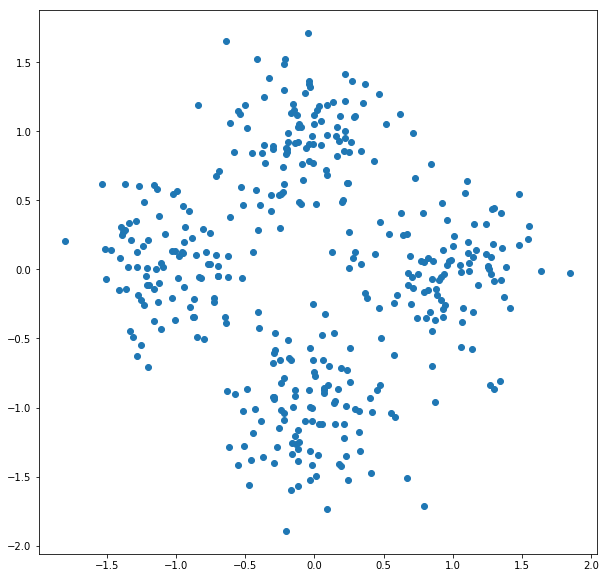

In [3]:
# Generate random data points for clustering
plt.rcParams['figure.figsize'] = (10.0, 10.0) #set default size of plots
# Set seed for consistency
np.random.seed(0)

# Cluster 1
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

# Cluster 4
mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

# Merge two sets of data points
X = np.concatenate((X1, X2, X3, X4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

$\textbf{2.1 K-Means Clustering}$

K-Means is one of the most popular clustering algorithms. We have provided skeleton code for K-Means clustering in the file segmentation.py. You first task is to finish implementing $\textbf{kmeans}$ in segmentation.py. This version uses nested for loops to assign points to the closest centroid and compute a new mean for each cluster.


In the cluster problem, the input dataset is $\{x^{(1)},...,x^{(m)}\}$, for each $x^{(i)} \in R^n$.

K-means clustering algorithm can cluster  samples into to number of k clusters. The details algorithm is described below. 

1. randomly select k cluster centroids: $u_i,u_2,...,u_k \in R^n$

2. Loop the process until convergence:

$$c^{(i)} := argmin_{j}||x^{(i)}-u_j||^2$$

    Then for each class j, recalculate the centroids of the class j
    
$$u_j := \frac{\sum^m_{i=1}1{(c^{(i)}==j)}x^{(i)}}{\sum^m_{i=1}1{(c^{i}==j)}}$$

Kmeans running time:0.321811 seconds.


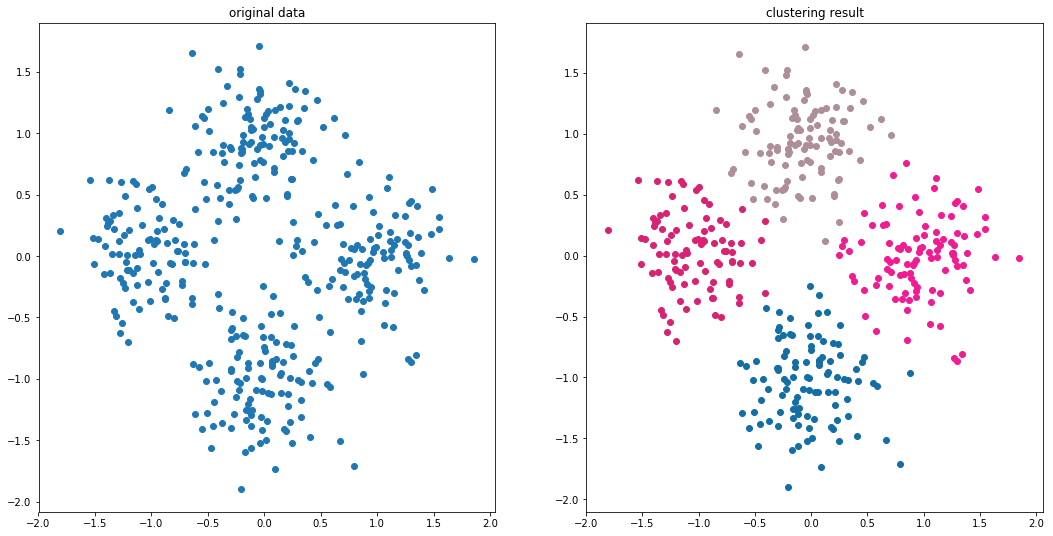

In [4]:
from Segmentation_method import KMeans
from Segmentation_method import colors
plt.rcParams['figure.figsize'] = (18, 9) #set default size of plots
# set the cluster number k
k = 4
#set the random seed
np.random.seed(0) 
start = time()
center,label = KMeans(X,k)
end =  time()
kmeans_runtime = end - start
print("Kmeans running time:%f seconds."% kmeans_runtime)
      
color = colors(k)
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('original data')
plt.subplot(1,2,2)
for i in range(len(label)):
    plt.scatter(X[i, 0], X[i, 1], color = color[int(label[i,0])])
plt.title('clustering result')
plt.show()

$\textbf{QUESTION 2:}$ 

Please give your algorithm's computational complexity? 




Write your analysis in the cell below.

$\textbf{Your answer here:}$

The time complexity depends on how long the actual program takes to converge.   
Let t be the number of times it takes to converge, the time complexity would be O(t * k * n * d), where k is the number of centroids, n is the number of data points, and d is the number of dimensions for each point.  

$\textbf{2.2. Mean shift clustering}$

An advanced and versatile technique for clustering-based clustering 

Given n data points $x_i \in R^d, i = 1,...,n$, randomly select a point $x$, the Mean Shift can be defined by:

$$\textit M_h = \frac{1}{\textit{K}}\sum_{x_i \in S_k}(x_i-x)$$

$S$ is a high dimension sphere which the radius is h, the point y set is:
$$\textit S_h(x) = \{y:(y-x_i)^T(y-x_i) < h^2\}$$
Introducing the kernel function, the Mean Shift can be written:

$$\hat f_K = \frac{1}{nh^d}\sum_{i=1}^n K(\frac{x-x_i}{h})$$

The radially symmetric kernel is defined as, 
$$K(x) = c_kk(||x||^2)$$

where $c_k$ represents a normalization constant. Taking the gradient of the density estimator and some further algebraic manipulation yields,
$$\bigtriangledown \hat f(x) = \underbrace{\frac{2c_{k,d}}{nh^{d+2}}[\sum_{i=1}^ng(||\frac{x-x_i}{h}||^2)]}_{term 1} \underbrace{[ \frac{\sum_{i=1}^nx_ig(||\frac{x-x_i}{h}||^2)}{\sum_{i=1}^ng([||\frac{x-x_i}{h}||^2])}]}_{term 2}$$

where $g(x) = -k^`$ denotes the derivative of the selected kernel profile. The first term is proportional to the density estimate at x(computed with the kernel $G = c_gg(||x||^2)$). The second term, called the $\textit{mean shift}$ vector, $\textbf{m}$, points toward the direction of maximum increase in density and is proportional to the densit gradient estimate at poinx x obtained with kernel $K$. The mean shift procedure for a given point $x_i$ is as follows: 

1. Compute the mean shift vector $\textbf{m}(x_i^t)$.

2. Translate density estimation window: $x_i^{t+1} = x_i^t + \textbf{m}(x_i^t)$.

3. Iterate steps 1. and 2. until convergence, i.e., $\bigtriangledown f(x_i) = 0$ 

$\textbf{Tips:}$

You may be confused by above math formulation:{, Some one may want to say: “so,how to implement the mean shift algoritm.”

Actually, You just need $\textbf{four steps}$:


1. Initialize random seed as the initial center, and window W;
2. Calculate center of gravity(the "mean") of W;
3. Shift the search window to the mean;
4. Repeat Step 2 until convergence.

Mean shift clustering running time:0.210875 seconds.


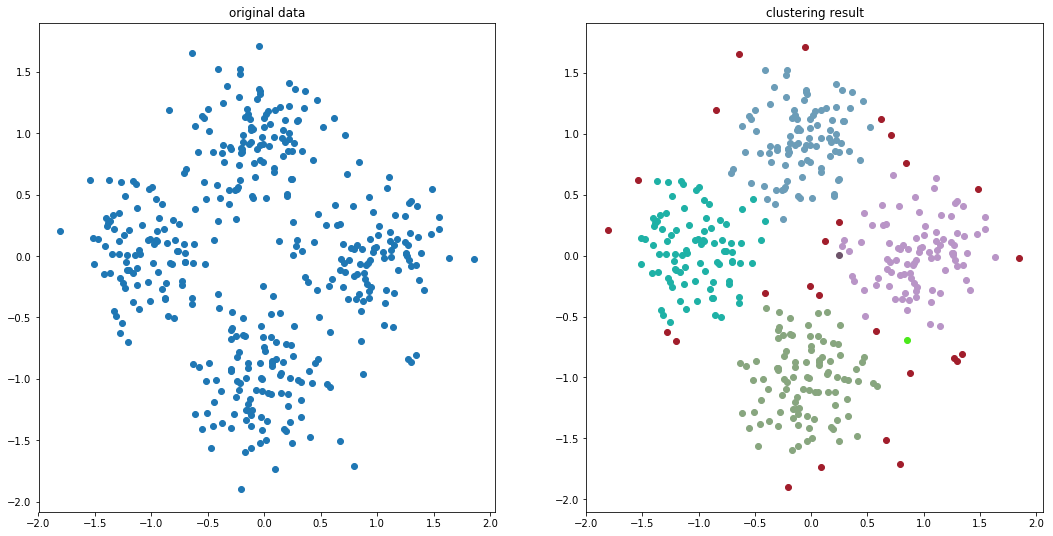

In [5]:
from Segmentation_method import mean_shift
plt.rcParams['figure.figsize'] = (18.0, 9.0) #set default size of plots

np.random.seed(0) 

start = time()
cluster_center,labels = mean_shift(X,bandwidth=0.7,bin_seeding=True)
end = time()
kmeans_runtime = end - start
print("Mean shift clustering running time:%f seconds."% kmeans_runtime)

color = colors(np.unique(labels).size)

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('original data')

plt.subplot(1,2,2)
for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color = color[labels[i]])
plt.title('clustering result')
plt.show()

$\textbf{3. Segmentation}$

Image segmentation is a classic subject in the field of image processing and also is a hotspot and focus of image processing techniques. The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with same label share certain characteristic.

$\textbf{3.1 K-means segmentation}$

(67500, 1)
Kmeans running time for Grayscale Intensity :13.373219 seconds.
Kmeans running time for RGB featue:27.106230 seconds.
Kmeans running time for texture featue:2.898310 seconds.


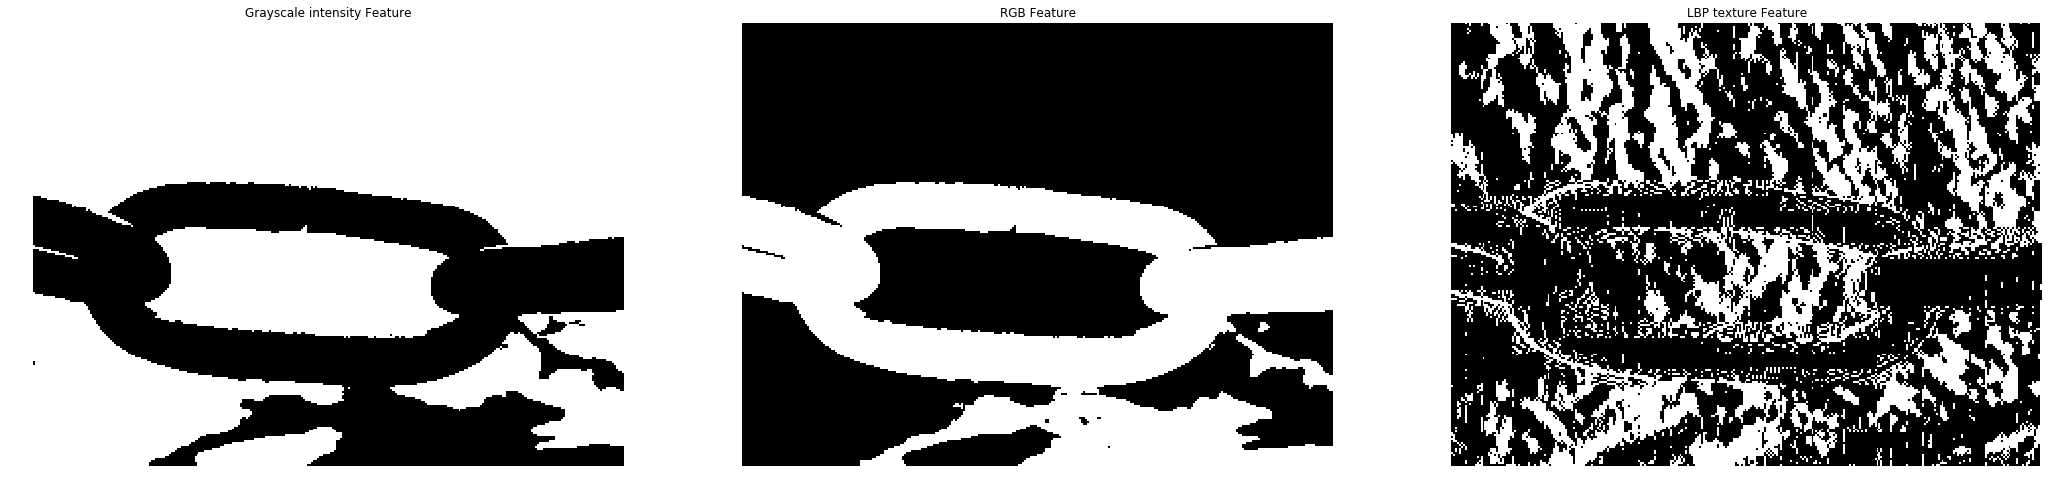

In [6]:
from Segmentation_method import KMeans

#set default size of plots
plt.rcParams['figure.figsize'] = (36.0, 12.0) 

#Use grayscale intensity feature
grayScale = img_gray.reshape(np.size(img_gray),-1)
k = 2
start = time()
center,label = KMeans(grayScale,k)
end =  time()
kmeans_runtime = end - start
print(label.shape)
print("Kmeans running time for Grayscale Intensity :%f seconds."% kmeans_runtime)
segmentation_image_grayScale = np.reshape(label,(show_img.shape)[:2])
plt.subplot(1,3,1)
plt.imshow(segmentation_image_grayScale)
plt.axis('off')
plt.title('Grayscale intensity Feature')


#Use RGB feature
rgbScale = show_img.reshape(np.size(img_gray),-1)
start = time()
# 0:Euclidean distance 1:cross entropy distance
center,label = KMeans(rgbScale,k)
end =  time()
kmeans_runtime = end - start
print("Kmeans running time for RGB featue:%f seconds."% kmeans_runtime)
segmentation_image_RGB = np.reshape(label,(show_img.shape)[:2])
plt.subplot(1,3,2)
plt.imshow(segmentation_image_RGB)
plt.axis('off')
plt.title('RGB Feature')

#Use texture feature
lbp_texture = lbp.reshape(np.size(img_gray),-1)
start = time()
center,label = KMeans(lbp_texture,k)
end =  time()
kmeans_runtime = end - start
print("Kmeans running time for texture featue:%f seconds."% kmeans_runtime)
segmentation_image_texture = np.reshape(label,(show_img.shape)[:2])
plt.subplot(1,3,3)
plt.imshow(segmentation_image_texture)
plt.axis('off')
plt.title('LBP texture Feature')
plt.show()

$\textbf{QUESTION 3:}$  

Please list some problem of the kmeans clustering algorithm?

1. Kmeans works well only for spherical clusters, it might cluster non-sphetical data wrongly.  
2. If the initial seeds are not generated well, the algorithm might not cluster correctly (e.g. splitting one cluster into two, if two initial seeds are close together; or combining two clusters into one, if the seeds are too far apart).

$\textbf{3.2 Mean shift segmentation}$

(15, 3)
number of estimated clusters : 2


(-0.5, 299.5, 303.5, -0.5)

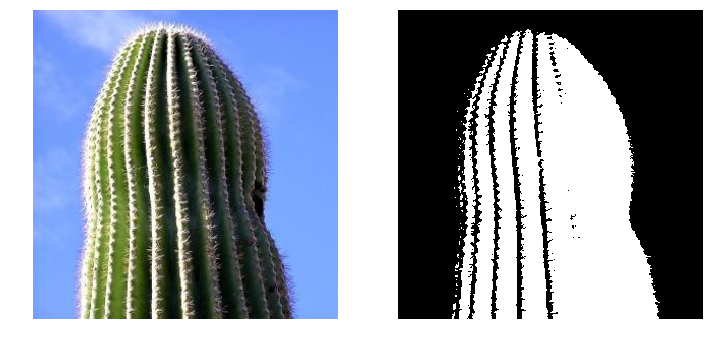

In [30]:
from PIL import Image
from Segmentation_method import *
#set default size of plots
plt.rcParams['figure.figsize'] = (12.0, 6.0) 
# image = Image.open('input\\003.png')
# image = Image.open('input\\100_0109.png')
# image = Image.open('input\\100_0497.png')
# image = Image.open('input\\b2chopper008.png')
# image = Image.open('input\\crw_0384.png')
# image = Image.open('test\\dscn1908.png')
# image = Image.open('test\\img_4730_modif.png')
# image = Image.open('test\\pict2272.png')
image = Image.open('test\\sharp_image.png')

image = np.array(image)
original_shape = image.shape
X = np.reshape(image, [-1,3])
# cluster_center,labels = mean_shift(X,bandwidth=160,bin_seeding=True)
cluster_center,labels = mean_shift(X,bandwidth=160,bin_seeding=True)
print(cluster_center.shape)
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)
segmented_image = np.reshape(labels, original_shape[:2])
plt.figure((22))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off') 

In [31]:
import matplotlib

# matplotlib.image.imsave('output\\100_0109_9.png', segmented_image)
# matplotlib.image.imsave('output\\100_0497_9.png', segmented_image)
# matplotlib.image.imsave('output\\b2chopper008_6.png', segmented_image)
# matplotlib.image.imsave('output\\crw_0384_13.png', segmented_image)
# matplotlib.image.imsave('output\\dscn1908_output_meanshift.png', segmented_image)
# matplotlib.image.imsave('output\\img_4730_modif_output_meanshift.png', segmented_image)
# matplotlib.image.imsave('output\\pict2272_output_meanshift.png', segmented_image)
matplotlib.image.imsave('output\\sharp_image_output_meanshift.png', segmented_image)

Kmeans running time for RGB featue:27.962058 seconds.


Text(0.5, 1.0, 'RGB Feature Segmentation')

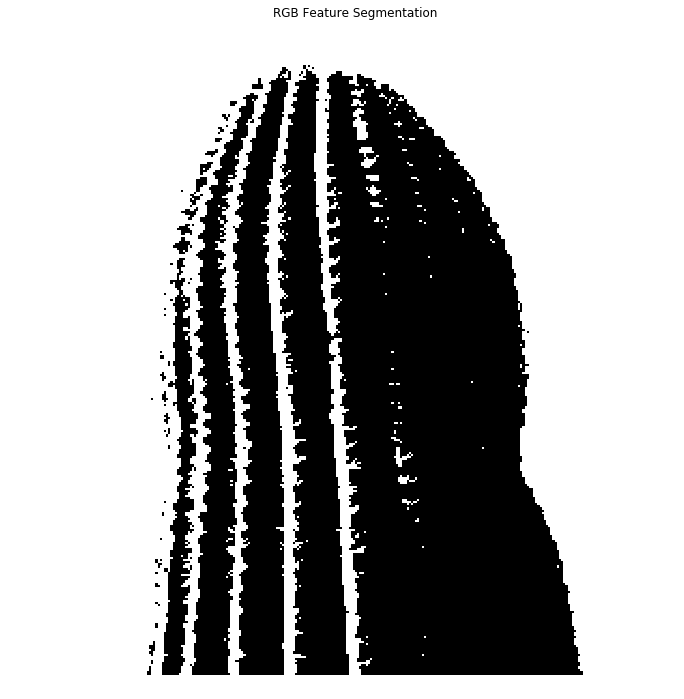

In [15]:
# test_img = cv2.imread("test\\dscn1908.png")
# test_img = cv2.imread("test\\img_4730_modif.png")
# test_img = cv2.imread("test\\pict2272.png")
test_img = cv2.imread("test\\sharp_image.png")

# RGB Feature
test_rgb_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

from Segmentation_method import KMeans

#set default size of plots
plt.rcParams['figure.figsize'] = (36.0, 12.0) 

img_gray = cv2.cvtColor(test_rgb_img,cv2.COLOR_RGB2GRAY)

k = 2

#Use RGB feature
rgbScale = test_rgb_img.reshape(np.size(img_gray),-1)
start = time()
# 0:Euclidean distance 1:cross entropy distance
center,label = KMeans(rgbScale,k)
end =  time()
kmeans_runtime = end - start
print("Kmeans running time for RGB featue:%f seconds."% kmeans_runtime)
segmentation_image_RGB = np.reshape(label,(test_rgb_img.shape)[:2])
plt.imshow(segmentation_image_RGB)
plt.axis('off')
plt.title('RGB Feature Segmentation')

In [16]:
import matplotlib

# matplotlib.image.imsave('output\\dscn1908_output_kmeans.png', segmentation_image_RGB)
# matplotlib.image.imsave('output\\img_4730_modif_output_kmeans.png', segmentation_image_RGB)
# matplotlib.image.imsave('output\\pict2272_output_kmeans.png', segmentation_image_RGB)
matplotlib.image.imsave('output\\sharp_image_output_kmeans.png', segmentation_image_RGB)

$\textbf{QUESTION 4:}$  

Please list the mean shift algorithm's problem? 

Write your analysis in the cell below.

$\textbf{Your answer here:}$

The selection of bandwidth has huge impacts on the final outcome.    
For an unknown data, we might not know what bandwidth to select and therefore might end up with incorrect clusters (i.e. having clusters split into multiple smaller parts, or have some clusters lumped together).   

You can use the above script  to evaluate a segmentation method’s ability to separate foreground from background on the input image. Use this script as a starting point to evaluate a variety of segmentation parameters.



Observe your results carefully and try to answer the following question:


1. Based on your experiments, how do each of the segmentation parameters affect the quality of the final foreground-background segmentation?


2. Are some images simply more difficult to segment correctly than others? If so, what are the qualities of these images that cause the segmentation algorithms to perform poorly?


3. Also feel free to point out or discuss any other interesting observations that you made.

$\textbf{Evaluate your algorithms by use the images in test file, please save your results in the output files.}$

Write your analysis in the cell below.

$\textbf{Your answer here:}$

1.
The larger the bandwidth, the less clusters we would have, and the clustering result would also become less detailed (i.e. boundaries would become more broadstroke). This is because the larger bandwidth divides the image into lesser number of fragments. To achieve background/foreground clustering, we need to increase the bandwidth until the expected clusters become 2.   
Similarly, the larger the k for k-means, the more clusters there are, and the segmentation result would be more detailed.   

2.
Images that have diverse colors within its foreground or background or harder to segment. This is because it is difficult for the algorithm to see the foreground (or background) as "one" due to the diversity of its colors.    
Also, when some parts of the foreground and background have similar colors, it is also difficult for the algorithm to distinguish between the foreground and background.   

# Final submission instructions
Please submit the following:

1) Keep the structure of all files in this folder the same as what we have provided. 
Please zip up the following folders under a folder named with your NUSNET ID: eg. `e0123456.zip` and submit the zipped folder to LumiNUS.
If unzip the file, the structure should be like this:

```bash
e0123456/
  Assignment-2/
    Assignment-2/
        input/
            ...
        test/
            ...          
        output/
            ...
        Segmentation.ipynb
        Segmentation_method.py
        ..
```